# Lead Scoring Assignment 

## Problem Statement:

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.  

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 


Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

### Objective:
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.


In [4]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',500)

## 1. Data Understanding

In [5]:
# Reading the dataset 
leads = pd.read_csv("leads.csv")
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

##### 1.1 Basic Sanity checks on the data

In [6]:
leads.shape

(9240, 37)

In [7]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [9]:
##### Checking Duplicates row/data 
leads.duplicated().sum()

0

- There is no duplicate row/data in the dataset

## 2. Data Preparationing and Cleaning

In [10]:
leads_copy = leads

In [11]:
# Prospect Id and Lead Number have all unique value and represent the Unique id, from business understanding it will not contribute in model building
# Dropping Prospect Id and Lead Number

leads.drop(["Prospect ID","Lead Number"], axis = 1, inplace = True)

In [12]:
# Converting all the string values to lower case
leads = leads.applymap(lambda s:s.lower() if type(s) == str else s)

# Replacing Select in the dataset with np.nan (as the no input is provided for that particular columns)
leads = leads.replace('select',np.nan)

In [13]:
## Checking all the columns for unique values

leads.nunique()

Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [14]:
## Categorical Columns with only 1 unique values have 0 variance and it will not bring any information to the model.

# Dropping categorical columns having 1 unique values 
leads.drop(["Magazine","Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque"], axis = 1, inplace = True)

In [15]:
## Checking the % Missing Value in the leads dataset

round((100 * (leads.isnull().sum()/leads.shape[0])),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [16]:
## Removing all the columns having Missing value more than 40% missing values
cols=leads.columns

for i in cols:
    if((100*(leads[i].isnull().sum()/len(leads.index))) >= 45):
        leads.drop(i, 1, inplace = True)

### % MISSING VALUE

In [17]:
# Checking the % missing Value
round((100 * (leads.isnull().sum()/leads.shape[0])),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

### 2.1 Missing Value Imputation - Categorical Columns

#### Checking & Handling `Lead Source` Column

In [18]:
round(100 * leads["Lead Source"].value_counts(dropna = False)/len(leads["Lead Source"]),2)

google               31.09
direct traffic       27.52
olark chat           18.99
organic search       12.49
reference             5.78
welingak website      1.54
referral sites        1.35
facebook              0.60
NaN                   0.39
bing                  0.06
click2call            0.04
press_release         0.02
live chat             0.02
social media          0.02
welearn               0.01
testone               0.01
youtubechannel        0.01
nc_edm                0.01
pay per click ads     0.01
welearnblog_home      0.01
blog                  0.01
Name: Lead Source, dtype: float64

 - Lead Source columns is highly skewed categorical variable , we will handle missing value with Mode and rest all the variable less than 10 as others also
 

In [19]:
leads["Lead Source"] = leads["Lead Source"].replace(np.nan,'google')

In [20]:
leads["Lead Source"] = leads["Lead Source"].replace(['welingak website','referral sites','facebook','bing','click2call','live chat','press_release','social media','pay per click ads','welearnblog_home','blog','welearn','nc_edm','youtubechannel','testone'],'others')

In [21]:
### Checking the Lead Sourse after imputation 
round(100 * leads["Lead Source"].value_counts()/len(leads["Lead Source"]),2)

google            31.48
direct traffic    27.52
olark chat        18.99
organic search    12.49
reference          5.78
others             3.73
Name: Lead Source, dtype: float64

##### Checking `Country` columns and its treatment

In [22]:
round(100 * leads["Country"].value_counts(dropna = False)/len(leads["Country"]),2)

india                   70.26
NaN                     26.63
united states            0.75
united arab emirates     0.57
singapore                0.26
saudi arabia             0.23
united kingdom           0.16
australia                0.14
qatar                    0.11
hong kong                0.08
bahrain                  0.08
oman                     0.06
france                   0.06
unknown                  0.05
canada                   0.04
nigeria                  0.04
south africa             0.04
germany                  0.04
kuwait                   0.04
sweden                   0.03
belgium                  0.02
bangladesh               0.02
italy                    0.02
ghana                    0.02
netherlands              0.02
china                    0.02
philippines              0.02
asia/pacific region      0.02
uganda                   0.02
malaysia                 0.01
switzerland              0.01
vietnam                  0.01
denmark                  0.01
indonesia 

- We observed Country has highly skewed in nature, it has `70%` values as `India` and `26%` as `NaN` which sums upto almost `96%`. 
- We should this country columns as its highly skewed

In [23]:
# Dropping the Country Column
leads.drop('Country', axis =1, inplace =True)

##### Checking `Specialization` columns and its treatment

In [24]:
round(100 * leads["Specialization"].value_counts(dropna = False)/len(leads["Specialization"]),2)

NaN                                  36.58
finance management                   10.56
human resource management             9.18
marketing management                  9.07
operations management                 5.44
business administration               4.36
it projects management                3.96
supply chain management               3.78
banking, investment and insurance     3.66
travel and tourism                    2.20
media and advertising                 2.20
international business                1.93
healthcare management                 1.72
hospitality management                1.23
e-commerce                            1.21
retail management                     1.08
rural and agribusiness                0.79
e-business                            0.62
services excellence                   0.43
Name: Specialization, dtype: float64

In [25]:
#Group all the Management realted Specializations to Management Specializations as they are similar in nature

leads['Specialization'] = leads['Specialization'].replace(['finance management','human resource management',
                                                           'marketing management','operations management',
                                                           'it projects management','supply chain management',
                                                    'healthcare management','hospitality management',
                                                           'retail management'] ,'management_specializations')  

In [26]:
leads['Specialization'] = leads['Specialization'].replace(['business administration','international business',
                                                           'rural and agribusiness','e-business'],
                                                          'business_specilazations')

In [27]:
leads['Specialization'] = leads['Specialization'].replace(['banking, investment and insurance','media and advertising',
                                                           'travel and tourism','services excellence',
                                                           'e-commerce'],'industry_specializations')

- Imputing any mode value in the NaN will create a bias in the data, we will rreplace it with not specificed

In [28]:
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Not_Specified')

In [29]:
round(100 * leads["Specialization"].value_counts(dropna = False)/len(leads["Specialization"]),2)

management_specializations    46.03
Not_Specified                 36.58
industry_specializations       9.70
business_specilazations        7.69
Name: Specialization, dtype: float64

##### Checking `What is your current occupation` columns and its treatment

In [30]:
round(100 * leads["What is your current occupation"].value_counts(dropna = False)/len(leads["What is your current occupation"]),2)

unemployed              60.61
NaN                     29.11
working professional     7.64
student                  2.27
other                    0.17
housewife                0.11
businessman              0.09
Name: What is your current occupation, dtype: float64

In [31]:
# We will impute the NAN as unemployed (using the mode of the categorical data) and also as the columns is skewed
# Also, we replace the housewife and businessman to other as well
leads["What is your current occupation"] = leads["What is your current occupation"].replace(np.nan, 'unemployed')
leads["What is your current occupation"] = leads["What is your current occupation"].replace(['housewife','businessman'], 'other')

In [32]:
round(100 * leads["What is your current occupation"].value_counts(dropna = False)/len(leads["What is your current occupation"]),2)

unemployed              89.72
working professional     7.64
student                  2.27
other                    0.37
Name: What is your current occupation, dtype: float64

##### Checking `What matters most to you in choosing a course` columns and its treatment

In [33]:
round(100 * leads["What matters most to you in choosing a course"].value_counts(dropna = False)/len(leads["What matters most to you in choosing a course"]),2)

better career prospects      70.65
NaN                          29.32
flexibility & convenience     0.02
other                         0.01
Name: What matters most to you in choosing a course, dtype: float64

In [34]:
# We will impute the NAN as other and also as the columns is skewed
# Also, we replace the flexibility & convenience to other as well
leads["What matters most to you in choosing a course"] = leads["What matters most to you in choosing a course"].replace([np.nan,'flexibility & convenience'], 'other')


In [35]:
round(100 * leads["What matters most to you in choosing a course"].value_counts(dropna = False)/len(leads["What matters most to you in choosing a course"]),2)

better career prospects    70.65
other                      29.35
Name: What matters most to you in choosing a course, dtype: float64

##### Checking `Tags ` columns and its treatment

In [36]:
round(100 * leads["Tags"].value_counts(dropna = False)/len(leads["Tags"]),2)

NaN                                                  36.29
will revert after reading the email                  22.42
ringing                                              13.02
interested in other courses                           5.55
already a student                                     5.03
closed by horizzon                                    3.87
switched off                                          2.60
busy                                                  2.01
lost to eins                                          1.89
not doing further education                           1.57
interested  in full time mba                          1.27
graduation in progress                                1.20
invalid number                                        0.90
diploma holder (not eligible)                         0.68
wrong number given                                    0.51
opp hangup                                            0.36
number not provided                                   0.

In [37]:
leads["Tags"].value_counts(normalize =True) *100

will revert after reading the email                  35.196195
ringing                                              20.434856
interested in other courses                           8.714116
already a student                                     7.898760
closed by horizzon                                    6.081196
switched off                                          4.076779
busy                                                  3.159504
lost to eins                                          2.972652
not doing further education                           2.463054
interested  in full time mba                          1.987430
graduation in progress                                1.885510
invalid number                                        1.409886
diploma holder (not eligible)                         1.070155
wrong number given                                    0.798369
opp hangup                                            0.560557
number not provided                                   0

In [38]:
#We observe that there are many category which has very bearing on the Tags Columns.
# To handle this we will replace low frequency Category as others
leads['Tags'] = leads['Tags'].replace(['closed by horizzon','switched off','busy', 'lost to eins',                                         
                                                            'not doing further education',                           
                                                            'interested  in full time mba',                          
                                                            'graduation in progress',                                
                                                            "invalid number",                                       
                                                            "diploma holder (not eligible)",                        
                                                            'wrong number given',                                    
                                                            'opp hangup',                                           
                                                            'number not provided',                                   
                                                            'in touch with eins',                                    
                                                            'lost to others',                                      
                                                            'want to take admission but has financial problems',
                                                            'still thinking',                                 
                                                            'interested in next batch',                           
                                                            'in confusion whether part time or dlp',             
                                                            'lateral student',                                    
                                                            'university not recognized',                        
                                                            'shall take in the next coming month',               
                                                            'recognition issue (dec approval)'], 'others')

leads['Tags'] = leads['Tags'].replace(np.nan,'others')

In [39]:
leads["Tags"].value_counts(normalize =True) *100

others                                 53.971861
will revert after reading the email    22.424242
ringing                                13.019481
interested in other courses             5.551948
already a student                       5.032468
Name: Tags, dtype: float64

##### Checking `City ` columns and its treatment

In [40]:
round(100 * leads["City"].value_counts(dropna = False)/len(leads["City"]),2)

NaN                            39.71
mumbai                         34.87
thane & outskirts               8.14
other cities                    7.42
other cities of maharashtra     4.95
other metro cities              4.11
tier ii cities                  0.80
Name: City, dtype: float64

In [41]:
# We will handle this by segmenting the category as metro tier II and other.
leads['City'] = leads['City'].replace(['thane & outskirts','tier ii cities'],'tier_ii_cities')
leads['City'] = leads['City'].replace(['mumbai','other metro cities'],'metro_cities')
leads['City'] = leads['City'].replace([np.nan,'other cities','other cities of maharashtra'],'others')

In [42]:
round(100 * leads["City"].value_counts(dropna = False)/len(leads["City"]),2)

others            52.08
metro_cities      38.98
tier_ii_cities     8.94
Name: City, dtype: float64

### 2.2 Missing Value Imputation - Numerical Columns

#### Checking & Handling the `TotalVisits` column

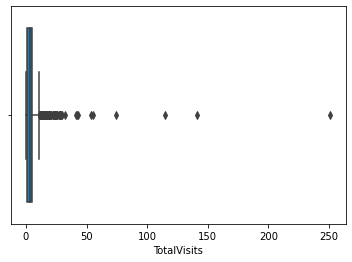

In [43]:
### Total Visits - Checking Outlier before null value treatment
sns.boxplot(leads['TotalVisits'])
plt.show()

In [44]:
leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [45]:
# Outlier Treatment:
# AS we can observe till 99th percentile the data is perfectly distuributed.
# Handling outlier by removing top & bottom 1% of the Column Outlier values

Q3 = leads.TotalVisits.quantile(0.99)
leads = leads[(leads.TotalVisits <= Q3)]
Q1 = leads.TotalVisits.quantile(0.01)
leads = leads[(leads.TotalVisits >= Q1)]
sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [46]:
# Checking the nulls
leads.TotalVisits.isnull().sum()

0

#### Checking & Handling the `Page Views Per Visit` column

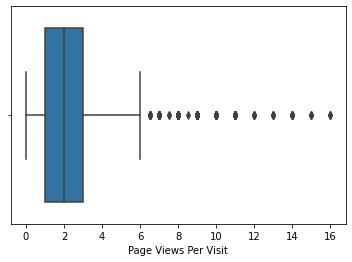

In [47]:
### Total Visits - Checking Outlier before null value treatment
sns.boxplot(leads['Page Views Per Visit'])
plt.show()

In [48]:
leads['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

In [49]:
# Outlier Treatment:
# AS we can observe till 99th percentile the data is perfectly distuributed.
# Handling outlier by removing top & bottom 1% of the Column Outlier values

Q3 = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[(leads['Page Views Per Visit'] <= Q3)]
Q1 = leads['Page Views Per Visit'].quantile(0.01)
leads = leads[(leads['Page Views Per Visit'] >= Q1)]
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

In [50]:
leads['Page Views Per Visit'].isnull().sum()

0

#### Rechecking Missing Values

In [51]:
# Checking the % missing Value
round((100 * (leads.isnull().sum()/leads.shape[0])),2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                          0.0
Tags                                          

## 3. Data Visualisation - EDA

In [52]:
# Having a look at the data
leads.head(2)

Lead Origin     Lead Source Do Not Email Do Not Call  Converted  \
0         api      olark chat           no          no          0   
1         api  organic search           no          no          0   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   

             Last Activity Specialization What is your current occupation  \
0  page visited on website  Not_Specified                      unemployed   
1             email opened  Not_Specified                      unemployed   

  What matters most to you in choosing a course Search Newspaper Article  \
0                       better career prospects     no                no   
1                       better career prospects     no                no   

  X Education Forums Newspaper Digital Advertisement Through Recommendations  \
0                 no        no                    no                      no   
1                 no        no                    no                      no   

                          Tags    City A free copy of Mastering The Interview  \
0  interested in other courses  others                                     no   
1                      ringing  others                                     no   

  Last Notable Activity  
0              modified  
1          email opened

### 3.1 Univariate Analysis

#### 3.1.1 Numerical Variables

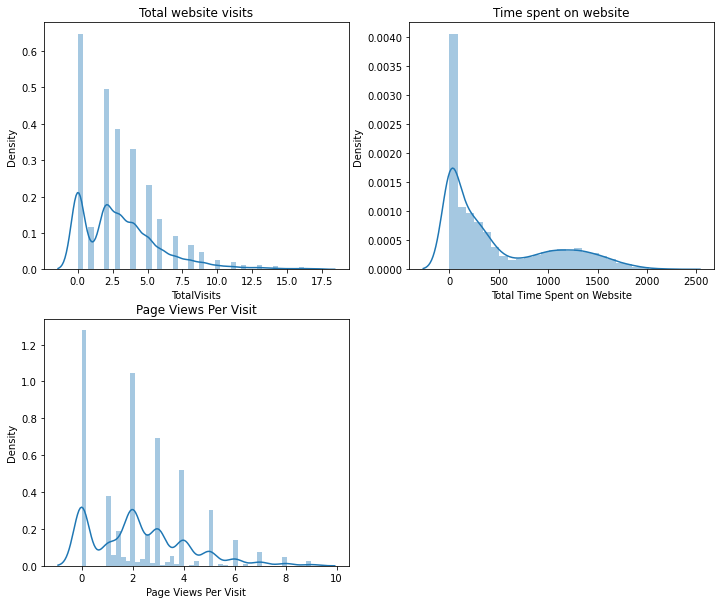

In [53]:
# See distribution of each of these columns
fig = plt.figure(figsize = (12, 10))
plt.subplot(2, 2, 1)
sns.distplot(leads['TotalVisits'],)
plt.title('Total website visits')

plt.subplot(2, 2, 2)
sns.distplot(leads['Total Time Spent on Website'])
plt.title('Time spent on website')

plt.subplot(2, 2, 3)
sns.distplot(leads['Page Views Per Visit'])
plt.title('Page Views Per Visit')

plt.show()

### 3.1 Bivariate Analysis -  in respect to `Converted`

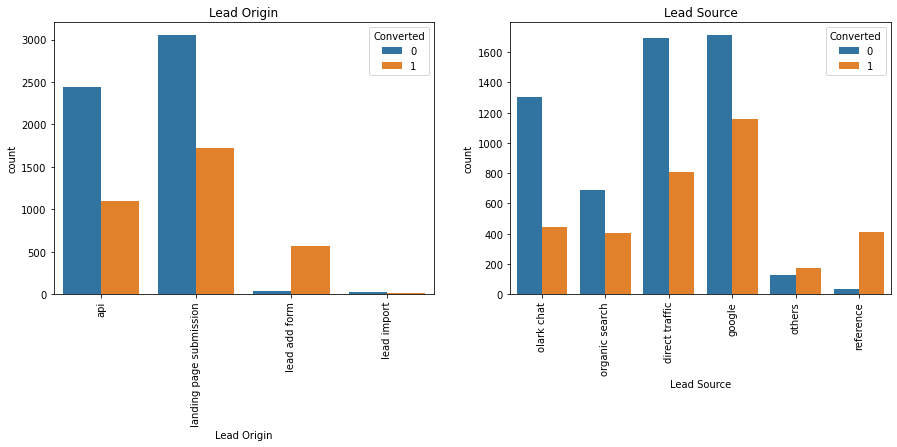

In [54]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()


- For Lead Origin , Land page submission and api are majority and chance of conversion is also High
- For Lead Source - google has a majority and with very good conversion chances

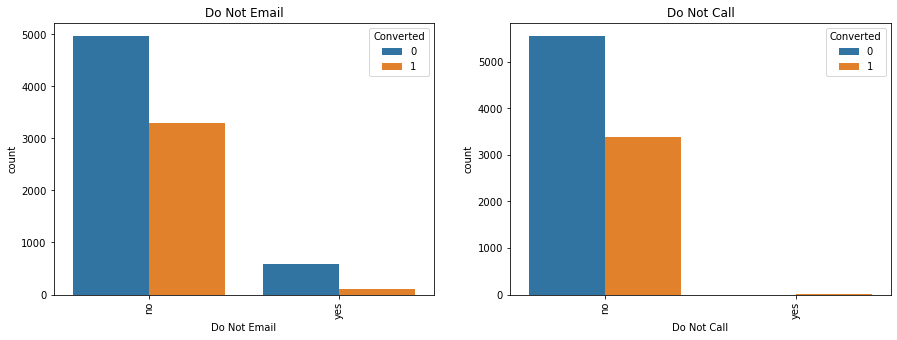

In [55]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

- Majority of person choose `Do Not Email` & `Do Not Call` yet the lead conversion is good

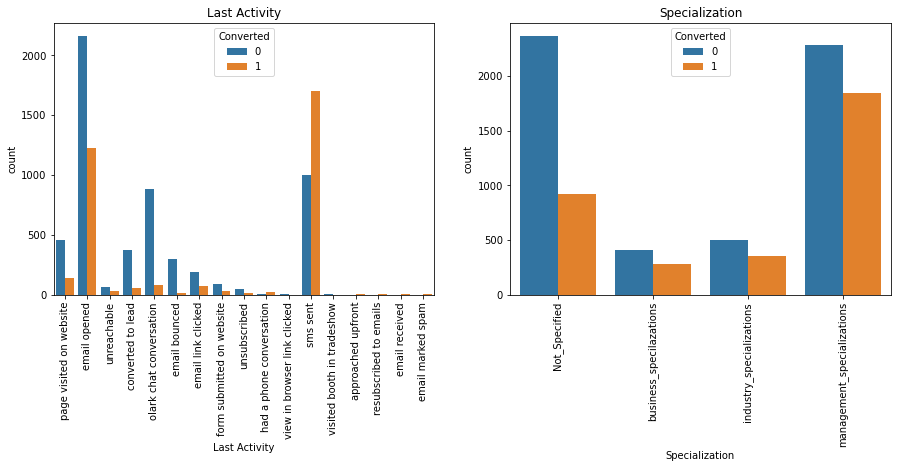

In [56]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Specialization', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.show()

- For Last Activity -  Page visited on website , email opened and sms sent are importance factor in lead convertsion
- Management Specialized & Not Specified person has better chance of lead conversion

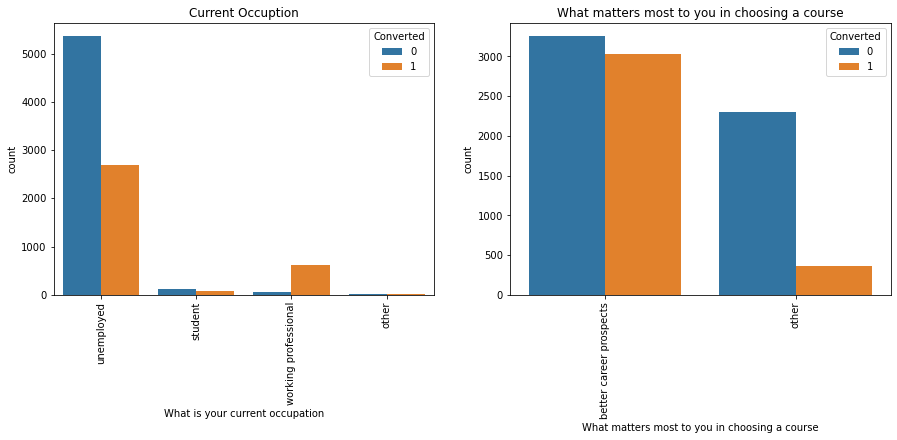

In [57]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='What is your current occupation', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Current Occuption')

plt.subplot(1,2,2)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.show()

- Current Occuption - except the other , all have good chances of lead conversion
- Better career prospect is very important factor in lead conversion

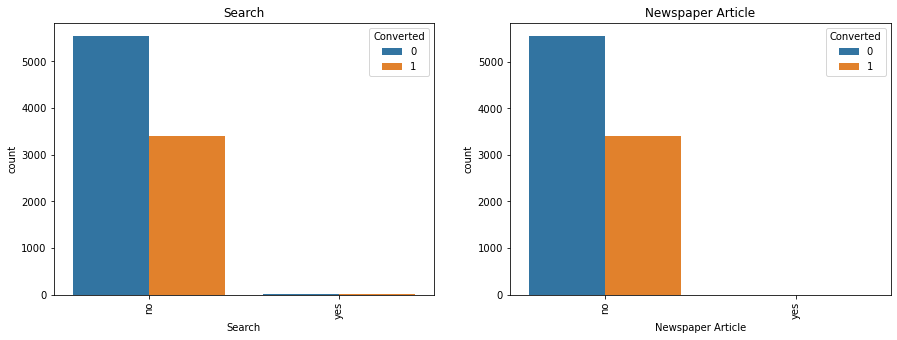

In [58]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Search', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Search')

plt.subplot(1,2,2)
sns.countplot(x='Newspaper Article', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')
plt.show()

- Newpaper Article & Search both do not contribute much towards leads conversion

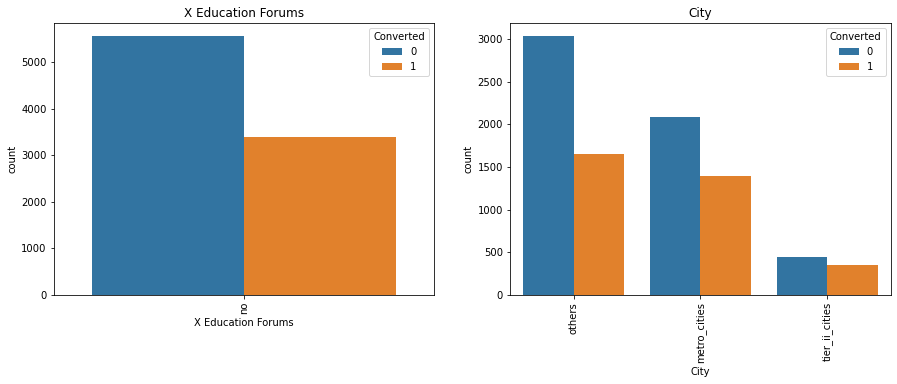

In [59]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='X Education Forums', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')

plt.subplot(1,2,2)
sns.countplot(x='City', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('City')
plt.show()

- Metro City and other cities has good lead conversion ratios

## 4. Data Preparation

In [60]:
leads.head(3)

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      api      olark chat           no          no   
1                      api  organic search           no          no   
2  landing page submission  direct traffic           no          no   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   

             Last Activity           Specialization  \
0  page visited on website            Not_Specified   
1             email opened            Not_Specified   
2             email opened  business_specilazations   

  What is your current occupation  \
0                      unemployed   
1                      unemployed   
2                         student   

  What matters most to you in choosing a course Search Newspaper Article  \
0                       better career prospects     no                no   
1                       better career prospects     no                no   
2                       better career prospects     no                no   

  X Education Forums Newspaper Digital Advertisement Through Recommendations  \
0                 no        no                    no                      no   
1                 no        no                    no                      no   
2                 no        no                    no                      no   

                                  Tags          City  \
0          interested in other courses        others   
1                              ringing        others   
2  will revert after reading the email  metro_cities   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     no              modified  
1                                     no          email opened  
2                                    yes          email opened

In [61]:
# Based on problem understanding , removing those columns which was added as part of feedback from sales teams
leads.drop(["Last Activity","Tags","Last Notable Activity","X Education Forums"], axis = 1, inplace = True)

In [62]:
### 4.1 Dummies Creation 

In [63]:
cat_col = leads.loc[:, leads.dtypes == 'object'].columns
cat_col

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'City',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [64]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(leads[cat_col], drop_first=True)
# Add the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)
leads.head()

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      api      olark chat           no          no   
1                      api  organic search           no          no   
2  landing page submission  direct traffic           no          no   
3  landing page submission  direct traffic           no          no   
4  landing page submission          google           no          no   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Specialization What is your current occupation  \
0             Not_Specified                      unemployed   
1             Not_Specified                      unemployed   
2   business_specilazations                         student   
3  industry_specializations                      unemployed   
4             Not_Specified                      unemployed   

  What matters most to you in choosing a course Search Newspaper Article  \
0                       better career prospects     no                no   
1                       better career prospects     no                no   
2                       better career prospects     no                no   
3                       better career prospects     no                no   
4                       better career prospects     no                no   

  Newspaper Digital Advertisement Through Recommendations          City  \
0        no                    no                      no        others   
1        no                    no                      no        others   
2        no                    no                      no  metro_cities   
3        no                    no                      no  metro_cities   
4        no                    no                      no  metro_cities   

  A free copy of Mastering The Interview  Lead Origin_landing page submission  \
0                                     no                                    0   
1                                     no                                    0   
2                                    yes                                    1   
3                                     no                                    1   
4                                     no                                    1   

   Lead Origin_lead add form  Lead Origin_lead import  Lead Source_google  \
0                          0                        0                   0   
1                          0                        0                   0   
2                          0                        0                   0   
3                          0                        0                   0   
4                          0                        0                   1   

   Lead Source_olark chat  Lead Source_organic search  Lead Source_others  \
0                       1                           0                   0   
1                       0                           1                   0   
2                       0                           0                   0   
3                       0                           0                   0   
4                       0                           0                   0   

   Lead Source_reference  Do Not Email_yes  Do Not Call_yes  \
0                      0                 0                0   
1                      0                 0                0   
2                      0                 0                0   
3                      0                 0                0   
4                      0                 0                0   

   Specialization_business_s

In [65]:
# Dropping the columns for which dummies have been created
leads.drop(cat_col, axis = 1, inplace = True)
leads.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   Lead Origin_landing page submission  Lead Origin_lead add form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_lead import  Lead Source_google  Lead Source_olark chat  \
0                        0                   0                       1   
1                        0                   0                       0   
2                        0                   0                       0   
3                        0                   0                       0   
4                        0                   1                       0   

   Lead Source_organic search  Lead Source_others  Lead Source_reference  \
0                           0                   0                      0   
1                           1                   0                      0   
2                           0                   0                      0   
3                           0                   0                      0   
4                           0                   0                      0   

   Do Not Email_yes  Do Not Call_yes  Specialization_business_specilazations  \
0                 0                0                                       0   
1                 0                0                                       0   
2                 0                0                                       1   
3                 0                0                                       0   
4                 0                0                                       0   

   Specialization_industry_specializations  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   Specialization_management_specializations  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   What is your current occupation_student  \
0                                        0   
1                                        0   
2                                        1   
3                                        0   
4                                        0   

   What is your current occupation_unemployed  \
0                                           1   
1                                           1   
2                                           0   
3                                           1   
4                                           1   

   What is your current occupation_working professional  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   What matters most to you in choosing a course_other  Search_yes  \
0                                                  0             0   
1                                                  0             0   
2                    

##### Train - Test Split

In [66]:
from sklearn.model_selection import train_test_split

y = leads['Converted']
X=leads.drop('Converted', axis=1)


In [67]:
# Splitting the train-test data into 70:30 ratio as per industry standards
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [68]:
# Checking the split
print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(6267, 28) (2686, 28) (6267,) (2686,)


###### Feature Scaling

In [69]:
# Importing Standard scaler
from sklearn.preprocessing import StandardScaler
# Scaling the three numeric features
scaler = StandardScaler()
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
7739    -0.402564                    -0.752128             -0.676270   
664     -0.056064                    -0.615463              0.379599   
2757     0.290436                     0.827719              0.907533   
7567     0.983436                    -0.037826             -0.148336   
2579     1.329936                    -0.334845              0.025883   

      Lead Origin_landing page submission  Lead Origin_lead add form  \
7739                                    0                          0   
664                                     0                          0   
2757                                    0                          0   
7567                                    1                          0   
2579                                    1                          0   

      Lead Origin_lead import  Lead Source_google  Lead Source_olark chat  \
7739                        0                   1                       0   
664                         0                   0                       0   
2757                        0                   0                       1   
7567                        0                   1                       0   
2579                        0                   0                       0   

      Lead Source_organic search  Lead Source_others  Lead Source_reference  \
7739                           0                   0                      0   
664                            1                   0                      0   
2757                           0                   0                      0   
7567                           0                   0                      0   
2579                           0                   0                      0   

      Do Not Email_yes  Do Not Call_yes  \
7739                 0                0   
664                  0                0   
2757                 0                0   
7567                 0                0   
2579                 0                0   

      Specialization_business_specilazations  \
7739                                       0   
664                                        0   
2757                                       0   
7567                                       1   
2579                                       0   

      Specialization_industry_specializations  \
7739                                        0   
664                                         0   
2757                                        0   
7567                                        0   
2579                                        0   

      Specialization_management_specializations  \
7739                                          0   
664                                           0   
2757                                          0   
7567                                          0   
2579                                          1   

      What is your current occupation_student  \
7739                                        0   
664                                         0   
2757                                        0   
7567                                        0   
2579                                        0   

      What is your current occupation_unemployed  \
7739                                           1   
664                                            1   
2757                                           1   
7567                                           1   
2579                                           1   

      What is your current occupation_working professional  \
7739                                                  0      
664                                                   0      
2757                                                  0      
7567                                                  0      
2579                                                  0      

      What matters most to you in choosing a course_other  Search_yes  

In [70]:
# checking the lead conversion rate
conversion = (sum(leads['Converted'])/len(leads['Converted'].index))*100
conversion

37.92025019546521

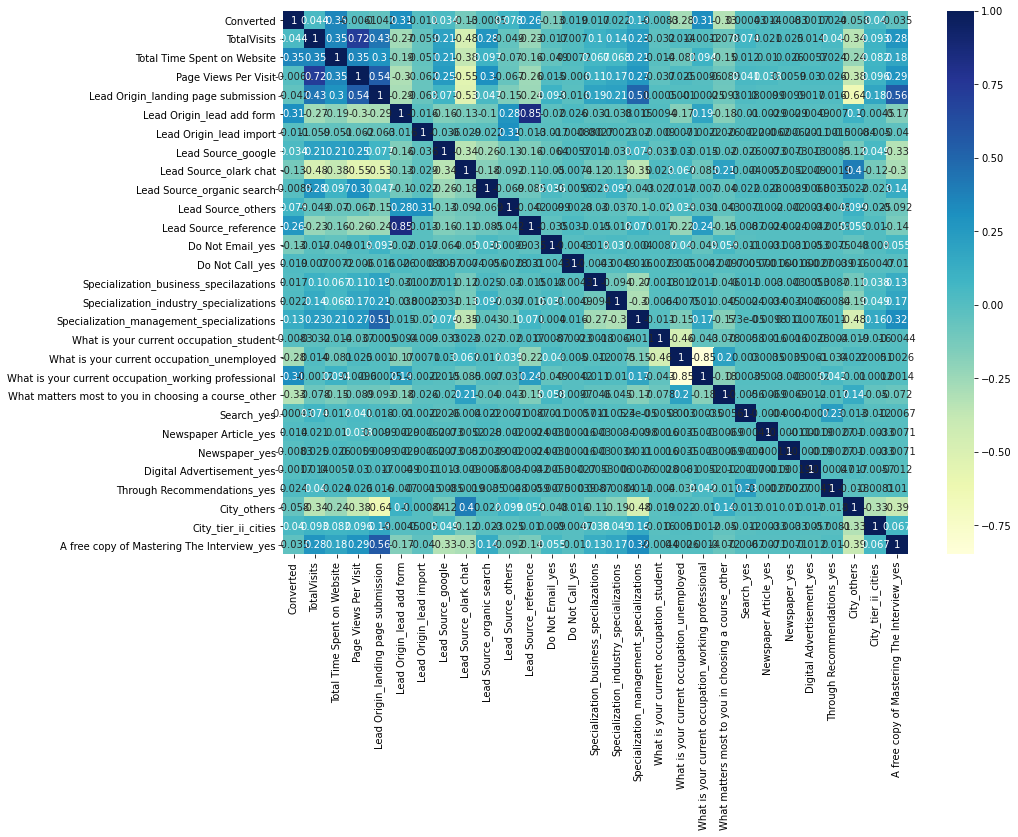

In [71]:
### Checking Correction
plt.figure(figsize = (14,10))       
sns.heatmap(leads.corr(),annot = True, cmap="YlGnBu")
plt.show()

## Model Building

### Model - I

In [72]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
 # Running RFE with 15 variables as output
rfe = RFE(logreg, 15)            
rfe = rfe.fit(X_train, y_train)

In [73]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 7),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 8),
 ('Lead Origin_landing page submission', True, 1),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', True, 1),
 ('Lead Source_google', False, 4),
 ('Lead Source_olark chat', True, 1),
 ('Lead Source_organic search', False, 6),
 ('Lead Source_others', False, 5),
 ('Lead Source_reference', True, 1),
 ('Do Not Email_yes', True, 1),
 ('Do Not Call_yes', False, 12),
 ('Specialization_business_specilazations', True, 1),
 ('Specialization_industry_specializations', True, 1),
 ('Specialization_management_specializations', True, 1),
 ('What is your current occupation_student', True, 1),
 ('What is your current occupation_unemployed', True, 1),
 ('What is your current occupation_working professional', True, 1),
 ('What matters most to you in choosing a course_other', True, 1),
 ('Search_yes', False, 11),
 ('Newspaper Article_yes', False, 2),
 ('Newspaper_yes', True, 1),

In [74]:
# Coulmns that the RFE ( automated mathod) has selected for model creation
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_landing page submission',
       'Lead Origin_lead add form', 'Lead Origin_lead import',
       'Lead Source_olark chat', 'Lead Source_reference', 'Do Not Email_yes',
       'Specialization_business_specilazations',
       'Specialization_industry_specializations',
       'Specialization_management_specializations',
       'What is your current occupation_student',
       'What is your current occupation_unemployed',
       'What is your current occupation_working professional',
       'What matters most to you in choosing a course_other', 'Newspaper_yes'],
      dtype='object')

In [75]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [76]:
# BUILDING MODEL #StatsModel 
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2747.9
Date:                Wed, 11 Aug 2021   Deviance:                       5495.7
Time:                        19:12:56   Pearson chi2:                 6.49e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7419      0.700      1.060      0.289      -0.630       2.113
Total Time Spent on Website                              1.0810      0.039     27.535      0.000       1.004       1.158
Lead Origin_landing page submission                     -0.6774      0.125     -5.411      0.000      -0.923      -0.432
Lead Origin_lead add form                                6.8360      1.014      6.743      0.000       4.849       8.823
Lead Origin_lead import                                  0.7575      0.481      1.575      0.115      -0.185       1.700
Lead Source_olark chat                                   1.0537      0.117      8.989      0.000       0.824       1.283
Lead Source_reference                                   -3.4277      1.034     -3.314      0.001      -5.455      -1.400
Do Not Email_yes                                        -1.4502      0.176     -8.242      0.000      -1.795      -1.105
Specialization_business_specilazations                   0.8522      0.166      5.134      0.000       0.527       1.177
Specialization_industry_specializations                  0.9408      0.155      6.053      0.000       0.636       1.245
Specialization_management_specializations                0.8517      0.123      6.918      0.000       0.610       1.093
What is your current occupation_student                 -2.1495      0.731     -2.940      0.003      -3.582      -0.717
What is your current occupation_unemployed              -1.6459      0.698     -2.359      0.018      -3.013      -0.278
What is your current occupation_working professional     0.6808      0.720      0.946      0.344      -0.730       2.091
What matters most to you in choosing a course_other     -1.3916      0.087    -16.020      0.000      -1.562      -1.221
Newspaper_yes                                          -22.4567   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
========================================================================================================================
"""

In [77]:
#dropping column with high p-value ( p>.05)

X_train.drop(['Newspaper_yes','What is your current occupation_working professional','Lead Origin_lead import'], axis = 1, inplace = True)

### Model - II

In [78]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6254
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2751.4
Date:                Wed, 11 Aug 2021   Deviance:                       5502.8
Time:                        19:12:57   Pearson chi2:                 6.46e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                   1.3943      0.195      7.134      0.000       1.011       1.777
Total Time Spent on Website                             1.0732      0.039     27.530      0.000       0.997       1.150
Lead Origin_landing page submission                    -0.7011      0.124     -5.643      0.000      -0.945      -0.458
Lead Origin_lead add form                               6.8133      1.014      6.722      0.000       4.827       8.800
Lead Source_olark chat                                  1.0311      0.116      8.876      0.000       0.803       1.259
Lead Source_reference                                  -3.4313      1.034     -3.317      0.001      -5.459      -1.404
Do Not Email_yes                                       -1.4484      0.176     -8.247      0.000      -1.793      -1.104
Specialization_business_specilazations                  0.8636      0.166      5.205      0.000       0.538       1.189
Specialization_industry_specializations                 0.9530      0.155      6.134      0.000       0.648       1.257
Specialization_management_specializations               0.8629      0.123      7.013      0.000       0.622       1.104
What is your current occupation_student                -2.7884      0.284     -9.829      0.000      -3.344      -2.232
What is your current occupation_unemployed             -2.2836      0.182    -12.553      0.000      -2.640      -1.927
What matters most to you in choosing a course_other    -1.3917      0.087    -16.037      0.000      -1.562      -1.222
=======================================================================================================================
"""

In [79]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                 Lead Origin_landing page submission  7.47
8           Specialization_management_specializations  5.49
10         What is your current occupation_unemployed  4.33
2                           Lead Origin_lead add form  3.88
4                               Lead Source_reference  3.76
7             Specialization_industry_specializations  1.98
3                              Lead Source_olark chat  1.93
6              Specialization_business_specilazations  1.80
11  What matters most to you in choosing a course_...  1.62
0                         Total Time Spent on Website  1.29
5                                    Do Not Email_yes  1.11
9             What is your current occupation_student  1.08

In [80]:
#dropping column with high VIF ( VIF>5)

X_train.drop('Lead Origin_landing page submission', axis = 1, inplace = True)

### Model - III

In [81]:
# Rebuilding the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6255
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2767.5
Date:                Wed, 11 Aug 2021   Deviance:                       5535.1
Time:                        19:12:57   Pearson chi2:                 6.44e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                   1.3389      0.195      6.876      0.000       0.957       1.721
Total Time Spent on Website                             1.0833      0.039     27.807      0.000       1.007       1.160
Lead Origin_lead add form                               6.9955      1.013      6.904      0.000       5.010       8.981
Lead Source_olark chat                                  1.2624      0.109     11.537      0.000       1.048       1.477
Lead Source_reference                                  -3.2250      1.034     -3.120      0.002      -5.251      -1.199
Do Not Email_yes                                       -1.4938      0.175     -8.532      0.000      -1.837      -1.151
Specialization_business_specilazations                  0.3632      0.140      2.600      0.009       0.089       0.637
Specialization_industry_specializations                 0.4571      0.127      3.589      0.000       0.207       0.707
Specialization_management_specializations               0.3773      0.088      4.304      0.000       0.205       0.549
What is your current occupation_student                -2.8884      0.280    -10.304      0.000      -3.438      -2.339
What is your current occupation_unemployed             -2.3542      0.180    -13.050      0.000      -2.708      -2.001
What matters most to you in choosing a course_other    -1.4252      0.086    -16.496      0.000      -1.595      -1.256
=======================================================================================================================
"""

In [82]:

# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
9          What is your current occupation_unemployed  3.98
1                           Lead Origin_lead add form  3.80
3                               Lead Source_reference  3.68
7           Specialization_management_specializations  2.29
2                              Lead Source_olark chat  1.68
10  What matters most to you in choosing a course_...  1.61
0                         Total Time Spent on Website  1.28
6             Specialization_industry_specializations  1.28
5              Specialization_business_specilazations  1.24
4                                    Do Not Email_yes  1.10
8             What is your current occupation_student  1.06

- Now all the feature have acceptable VIF and P value, Moving on to derive the Probabilities, Lead Score, Predictions on Train Data

In [83]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7739    0.037136
664     0.042808
2757    0.758365
7567    0.107330
2579    0.268778
93      0.204233
8143    0.478315
2142    0.551634
1685    0.330935
3273    0.330935
dtype: float64

In [84]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.03713572, 0.04280794, 0.75836517, 0.10733014, 0.26877763,
       0.20423281, 0.47831531, 0.5516344 , 0.33093486, 0.33093486])

In [85]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

Converted  Conversion_Prob
0          0         0.037136
1          0         0.042808
2          1         0.758365
3          0         0.107330
4          0         0.268778

In [86]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted
0          0         0.037136          0
1          0         0.042808          0
2          1         0.758365          1
3          0         0.107330          0
4          0         0.268778          0

### Model Evaluation

In [87]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3482,  414],
       [ 832, 1539]], dtype=int64)

In [88]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8011807882559439


In [89]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [90]:
# Let us calculate specificity
TN / float(TN+FP)

0.8937371663244353

In [91]:
# Calculating the sensitivity
TP/(TP+FN)

0.6490932096161957

In [92]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.10626283367556469


In [93]:
# positive predictive value 
print (TP / float(TP+FP))

0.7880184331797235


In [94]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8071395456652758


#### PLOTTING ROC CURVE - Finiding Optimal Cutoff value for probabilities

In [95]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [96]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

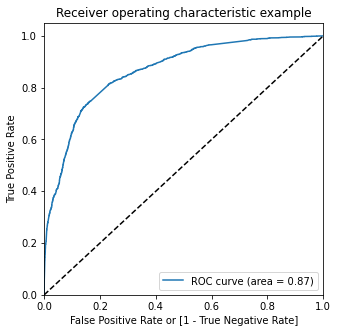

In [97]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

- The ROC Curve should be a value close to 1. We are getting a above average value of 0.87 indicating a good predictive model.

### Optimal Cutoff Point 

In [98]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.037136          0    1    0    0    0    0    0    0   
1          0         0.042808          0    1    0    0    0    0    0    0   
2          1         0.758365          1    1    1    1    1    1    1    1   
3          0         0.107330          0    1    1    0    0    0    0    0   
4          0         0.268778          0    1    1    1    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    1    0    0  
3    0    0    0  
4    0    0    0

In [99]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

prob  accuracy     sensi     speci
0.0   0.0  0.378331  1.000000  0.000000
0.1   0.1  0.540131  0.982708  0.270791
0.2   0.2  0.694272  0.910586  0.562628
0.3   0.3  0.776767  0.827077  0.746150
0.4   0.4  0.807723  0.714045  0.864733
0.5   0.5  0.801181  0.649093  0.893737
0.6   0.6  0.784426  0.570645  0.914528
0.7   0.7  0.760970  0.468579  0.938912
0.8   0.8  0.739110  0.358920  0.970483
0.9   0.9  0.696027  0.207929  0.993070

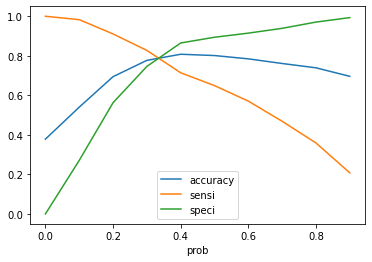

In [100]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()



## Trade-Off between Prediction & Recall

In [101]:
from sklearn.metrics import precision_recall_curve

In [102]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

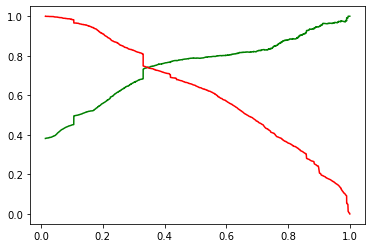

In [103]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [104]:
## We are getting new cutt-off values  as  0.30
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.30 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.037136          0    1    0    0    0    0    0    0   
1          0         0.042808          0    1    0    0    0    0    0    0   
2          1         0.758365          1    1    1    1    1    1    1    1   
3          0         0.107330          0    1    1    0    0    0    0    0   
4          0         0.268778          0    1    1    1    0    0    0    0   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    1    0    0                1  
3    0    0    0                0  
4    0    0    0                0

### Evaluating the Model Built after ROC & Trade Off Between Precision & Recall

In [105]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2907,  989],
       [ 410, 1961]], dtype=int64)

In [106]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [107]:
# Calculating the sensitivity
TP/(TP+FN)

0.8270771826233657

In [108]:
# Calculating the specificity
TN/(TN+FP)

0.7461498973305954

In [109]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7767671932344025

Some of the other Stats are derived below,Predictive Values, Precision, Recall and F1 Score

In [110]:
from sklearn.metrics import precision_score, recall_score

In [111]:
P = round(100 * precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted),2)
print("Precision",P )

Precision 66.47


In [112]:
R =round(100 * recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted),2)
print("Recall", R)

Recall 82.71


In [113]:
F1 = (2*P*R)/(P+R)
print("F1_score", F1)

F1_score 73.70604236492827


#### Observation:
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.87, which is desent. We have the following values for the Train Data:

- Accuracy    : 77.67%
- Sensitivity : 82.71%
- Specificity : 74.61%

###  PREDICTION ON TEST SET

In [114]:
# Scaling numeric values
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [115]:
# Substituting all the columns in the final train model
col = X_train.columns

In [116]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm.head()


const  Total Time Spent on Website  Lead Origin_lead add form  \
4322    1.0                    -0.161736                          0   
3829    1.0                    -0.540753                          0   
9004    1.0                    -0.877860                          0   
8782    1.0                     0.140750                          0   
1251    1.0                    -0.843238                          0   

      Lead Source_olark chat  Lead Source_reference  Do Not Email_yes  \
4322                       1                      0                 0   
3829                       0                      0                 0   
9004                       1                      0                 0   
8782                       0                      0                 0   
1251                       0                      0                 0   

      Specialization_business_specilazations  \
4322                                       0   
3829                                       0   
9004                                       0   
8782                                       0   
1251                                       0   

      Specialization_industry_specializations  \
4322                                        0   
3829                                        0   
9004                                        0   
8782                                        0   
1251                                        0   

      Specialization_management_specializations  \
4322                                          1   
3829                                          1   
9004                                          0   
8782                                          1   
1251                                          1   

      What is your current occupation_student  \
4322                                        0   
3829                                        0   
9004                                        0   
8782                                        0   
1251                                        0   

      What is your current occupation_unemployed  \
4322                                           1   
3829                                           0   
9004                                           1   
8782                                           1   
1251                                           1   

      What matters most to you in choosing a course_other  
4322                                                  1    
3829                                                  0    
9004                                                  0    
8782                                                  0    
1251                                                  0

In [117]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)

# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

Converted  Conversion_Prob
0          0         0.273666
1          1         0.755898
2          1         0.330935
3          0         0.380928
4          0         0.174857

In [118]:
# Making prediction using cut off 0.30
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.30 else 0)
y_pred_final.head()

Converted  Conversion_Prob  final_predicted
0          0         0.273666                0
1          1         0.755898                1
2          1         0.330935                1
3          0         0.380928                1
4          0         0.174857                0

In [119]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1207,  455],
       [ 191,  833]], dtype=int64)

In [120]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [121]:
# Calculating the sensitivity
TP/(TP+FN)

0.8134765625

In [122]:
# Calculating the specificity
TN/(TN+FP)

0.7262334536702768

In [123]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.759493670886076

#### Observation:
We have the following values for the Test Data:

- Accuracy : 75.95%
- Sensitivity : 81.38%
- Specificity : 72.62%

### Lead Score - Assignment 

In [124]:
y_pred_final['Lead Score']=y_pred_final['Conversion_Prob'].apply(lambda x:round(x*100))


y_pred_final.head()

Converted  Conversion_Prob  final_predicted  Lead Score
0          0         0.273666                0          27
1          1         0.755898                1          76
2          1         0.330935                1          33
3          0         0.380928                1          38
4          0         0.174857                0          17

## Conclusion:

`Train Data` 
- Accuracy    : 77.67%
- `Sensitivity` : 82.71%
- Specificity : 74.61%

`Test Data`
- Accuracy : 75.95%
- `Sensitivity` : 81.38%
- Specificity : 72.62%


#### Model Summary

In [125]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6255
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2767.5
Date:                Wed, 11 Aug 2021   Deviance:                       5535.1
Time:                        19:13:03   Pearson chi2:                 6.44e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                   1.3389      0.195      6.876      0.000       0.957       1.721
Total Time Spent on Website                             1.0833      0.039     27.807      0.000       1.007       1.160
Lead Origin_lead add form                               6.9955      1.013      6.904      0.000       5.010       8.981
Lead Source_olark chat                                  1.2624      0.109     11.537      0.000       1.048       1.477
Lead Source_reference                                  -3.2250      1.034     -3.120      0.002      -5.251      -1.199
Do Not Email_yes                                       -1.4938      0.175     -8.532      0.000      -1.837      -1.151
Specialization_business_specilazations                  0.3632      0.140      2.600      0.009       0.089       0.637
Specialization_industry_specializations                 0.4571      0.127      3.589      0.000       0.207       0.707
Specialization_management_specializations               0.3773      0.088      4.304      0.000       0.205       0.549
What is your current occupation_student                -2.8884      0.280    -10.304      0.000      -3.438      -2.339
What is your current occupation_unemployed             -2.3542      0.180    -13.050      0.000      -2.708      -2.001
What matters most to you in choosing a course_other    -1.4252      0.086    -16.496      0.000      -1.595      -1.256
=======================================================================================================================
"""

#### Importance of Each Variable in desending Order
1. Lead Origin_lead add form
2. Lead Source_reference
3. What is your current occupation_student
4. What is your current occupation_unemployed
5. Do Not Email_yes
6. What matters most to you in choosing a course_other
7. Lead Source_olark chat
8. Total Time Spent on Website
9. Specialization_industry_specializations
10.Specialization_management_specializations
11.Specialization_business_specilazations


### Lead Score
Lead score value is assigned to each data point/ candidate, score above 30 score means conversion is possible .
Increase in Lead Score means the probability of lead conversion increase and has a maximum value of 100.